In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
gdp_df = pd.read_csv('data/macro/gdp.csv')
cpi_df = pd.read_csv('data/macro/cpi.csv')
df = pd.read_csv('boston19to23_spatial.csv')

In [25]:
gdp_df.head()

,Line,Unnamed: 1,2018,2018.1,2018.2,2018.3,2019,2019.1,2019.2,2019.3,...,2022.3,2023,2023.1,2023.2,2023.3,2024,2024.1,2024.2,2024.3,2025
0,Line,NaN,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,...,Q4,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1
1,1,Gross domestic product,20044.1,20150.5,20276.2,20304.9,20431.6,20602.3,20843.3,20985.4,...,22249.5,22403.4,22539.4,22780.9,22960.6,23053.5,23223.9,23400.3,23542.3,23526.1
2,2,Personal consumption expenditures,13558.4,13631.0,13693.8,13736.6,13758.3,13875.7,14033.2,14125.3,...,15324.0,15510.2,15548.5,15646.7,15781.4,15856.9,15967.3,16113.0,16273.2,16345.6
3,3,Goods,4355.3,4365.7,4385.6,4408.2,4420.5,4496.8,4561.0,4576.0,...,5200.0,5293.5,5288.9,5334.1,5378.5,5362.8,5402.1,5476.7,5560.1,5567.4
4,4,Durable goods,1496.9,1505.6,1516.4,1518.9,1505.4,1549.2,1585.7,1598.6,...,1895.4,1971.8,1970.2,1990.5,2004.5,1995.7,2022.3,2059.8,2120.7,2102.4


In [26]:
print(gdp_df.head())

   Line                         Unnamed: 1     2018   2018.1   2018.2  \
0  Line                                NaN       Q1       Q2       Q3   
1     1             Gross domestic product  20044.1  20150.5  20276.2   
2     2  Personal consumption expenditures  13558.4  13631.0  13693.8   
3     3                              Goods   4355.3   4365.7   4385.6   
4     4                      Durable goods   1496.9   1505.6   1516.4   

    2018.3     2019   2019.1   2019.2   2019.3  ...   2022.3     2023  \
0       Q4       Q1       Q2       Q3       Q4  ...       Q4       Q1   
1  20304.9  20431.6  20602.3  20843.3  20985.4  ...  22249.5  22403.4   
2  13736.6  13758.3  13875.7  14033.2  14125.3  ...  15324.0  15510.2   
3   4408.2   4420.5   4496.8   4561.0   4576.0  ...   5200.0   5293.5   
4   1518.9   1505.4   1549.2   1585.7   1598.6  ...   1895.4   1971.8   

    2023.1   2023.2   2023.3     2024   2024.1   2024.2   2024.3     2025  
0       Q2       Q3       Q4       Q1       Q2

In [27]:
# Extract the GDP row (usually row index 1)
gdp_row = gdp_df.iloc[1, 2:]  # skip 'Line' and 'Unnamed: 1'

In [28]:
import pandas as pd

# Convert column names to string
col_names = gdp_row.index.astype(str)

# Parse the column names to periods
def parse_quarter(col):
    if '.' in col:
        year, q_idx = col.split('.')
        q_idx = int(q_idx)
    else:
        year = col
        q_idx = 0
    quarter_num = q_idx + 1
    return pd.Period(f"{year}Q{quarter_num}", freq='Q')

# Apply to all columns
quarters = [parse_quarter(c) for c in col_names]

# Build GDP time series
gdp_series = pd.DataFrame({
    'quarter': quarters,
    'GDP': gdp_row.values.astype(float)
}).sort_values('quarter').reset_index(drop=True)

# Compute YoY % change
gdp_series['GDP_YoY'] = gdp_series['GDP'].pct_change(periods=4) * 100


In [29]:
gdp_series

,quarter,GDP,GDP_YoY
0,2018Q1,20044.1,NaN
1,2018Q2,20150.5,NaN
2,2018Q3,20276.2,NaN
3,2018Q4,20304.9,NaN
4,2019Q1,20431.6,1.933237
5,2019Q2,20602.3,2.242128
6,2019Q3,20843.3,2.796875
7,2019Q4,20985.4,3.351408
8,2020Q1,20693.2,1.280370
9,2020Q2,19056.6,-7.502560


In [30]:
# now let us calculate the YoY of CPI
cpi_df.head()

,Series ID,Description,Jan 2018,Feb 2018,Mar 2018,Apr 2018,May 2018,Jun 2018,Jul 2018,Aug 2018,...,May 2025,Jun 2025,Jul 2025,Aug 2025,Sep 2025,Oct 2025,Nov 2025,Dec 2025,HALF1 2025,HALF2 2025
0,CUUR0000SA0,Original Data Value,247.867,248.991,249.554,250.546,251.588,251.989,252.006,252.146,...,,,,,,,,,,
1,CUUR0000SA0,12-Month Percent Change,2.100,2.200,2.400,2.500,2.800,2.900,2.900,2.700,...,,,,,,,,,,NaN


In [31]:
print(cpi_df.head())

     Series ID              Description  Jan 2018  Feb 2018  Mar 2018  \
0  CUUR0000SA0      Original Data Value   247.867   248.991   249.554   
1  CUUR0000SA0  12-Month Percent Change     2.100     2.200     2.400   

   Apr 2018  May 2018  Jun 2018  Jul 2018  Aug 2018  ...  May 2025  Jun 2025  \
0   250.546   251.588   251.989   252.006   252.146  ...                       
1     2.500     2.800     2.900     2.900     2.700  ...                       

   Jul 2025  Aug 2025  Sep 2025  Oct 2025  Nov 2025  Dec 2025  HALF1 2025  \
0                                                                           
1                                                                           

   HALF2 2025  
0              
1         NaN  

[2 rows x 114 columns]


In [32]:
# Extract the second row (index 1) for YoY % change

# Parse column names into datetime
# cpi_dates = pd.to_datetime(cpi_row.index, format="%b %Y", errors='coerce')

# Extract raw CPI values (row 0) and YoY % change (row 1)
cpi_raw_row = cpi_df.iloc[0, 2:]     # skip 'Series ID', 'Description'
cpi_yoy_row = cpi_df.iloc[1, 2:]     # same

# Parse column names into datetime
parsed_dates = pd.to_datetime(cpi_raw_row.index, format="%b %Y", errors='coerce')
valid_mask = parsed_dates.notna()

# Create final CPI series DataFrame
cpi_series = pd.DataFrame({
    'month': parsed_dates[valid_mask],
    'CPI': pd.to_numeric(cpi_raw_row[valid_mask], errors='coerce'),
    'CPI_YoY': pd.to_numeric(cpi_yoy_row[valid_mask], errors='coerce')
}).dropna().reset_index(drop=True)

# Optional: sort by date
cpi_series = cpi_series.sort_values('month')

In [33]:
cpi_series

,month,CPI,CPI_YoY
0,2018-01-01,247.867,2.1
1,2018-02-01,248.991,2.2
2,2018-03-01,249.554,2.4
3,2018-04-01,250.546,2.5
4,2018-05-01,251.588,2.8
...,...,...,...
83,2024-12-01,315.605,2.9
84,2025-01-01,317.671,3.0
85,2025-02-01,319.082,2.8
86,2025-03-01,319.799,2.4


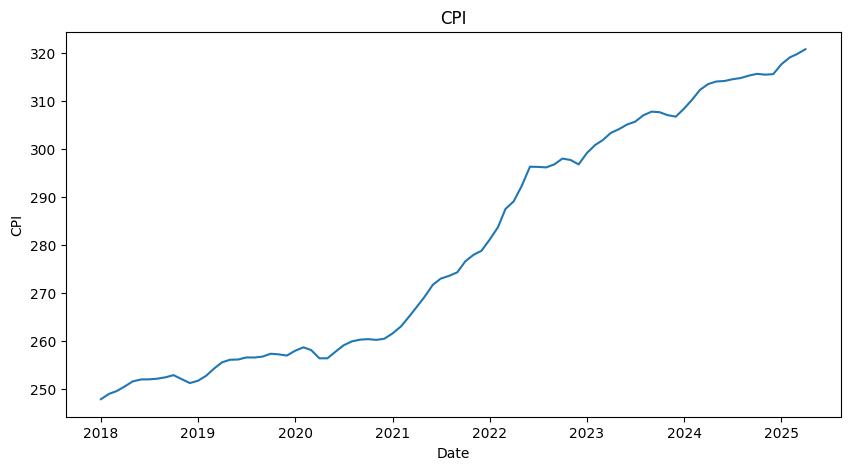

In [34]:
# plot cpi_series
plt.figure(figsize=(10, 5))
plt.plot(cpi_series['month'], cpi_series['CPI'])
plt.title('CPI')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.show()

In [35]:
# change cpi_series month to only have year and month
cpi_series['month'] = cpi_series['month'].dt.to_period('M')
cpi_series
# now we can merge the data.

,month,CPI,CPI_YoY
0,2018-01,247.867,2.1
1,2018-02,248.991,2.2
2,2018-03,249.554,2.4
3,2018-04,250.546,2.5
4,2018-05,251.588,2.8
...,...,...,...
83,2024-12,315.605,2.9
84,2025-01,317.671,3.0
85,2025-02,319.082,2.8
86,2025-03,319.799,2.4


In [36]:
# change the sale_date to datetime
df['sale_date'] = pd.to_datetime(df['sale_date'])


In [37]:
# now let us merge the data to the sales data.

# first we need to create a quarter column in the sales data.
df['quarter'] = df['sale_date'].dt.to_period('Q')




In [38]:
df['quarter']

0        2019Q2
1        2019Q2
2        2019Q1
3        2019Q2
4        2019Q2
          ...  
31014    2023Q4
31015    2023Q3
31016    2023Q2
31017    2023Q1
31018    2023Q4
Name: quarter, Length: 31019, dtype: period[Q-DEC]

In [39]:
# now we can merge the data.
df = df.merge(gdp_series, on='quarter', how='left')

In [40]:
# check if GDP_YoY is null
df['GDP_YoY'].isnull().sum()
# now we can merge the data.

0

In [41]:
# now we create a month column in the sales data.
df['month'] = df['sale_date'].dt.to_period('M')


In [42]:
df['month']

0        2019-06
1        2019-06
2        2019-03
3        2019-06
4        2019-06
          ...   
31014    2023-11
31015    2023-09
31016    2023-04
31017    2023-03
31018    2023-12
Name: month, Length: 31019, dtype: period[M]

In [43]:
# now we can merge the data.
df = df.merge(cpi_series, on='month', how='left')
# check if CPI_YoY is null
df['CPI_YoY'].isnull().sum()
# now we can merge the data.


0

In [44]:
df.columns

Index(['sale_date', 'sale_price', 'parcel', 'street_no', 'living_area',
       'category', 'price_per_sf', 'street_name', 'y', 'full_address', 'x',
       'owner_property_count', 'total_room_num', 'half_bathrooms',
       'fireplaces', 'bathrooms', 'exterior_condition', 'year_built',
       'properties', 'interior_condition', 'heat_type', 'kitchens',
       'owner_name', 'bedrooms', 'ac_type', 'parking_spots', 'foundation',
       'year', 'modified_z', 'NEAR_FID', 'NEAR_DIST', 'NEAR_DIST_Health',
       'NEAR_FC', 'NEAR_DIST_Safety', 'NEAR_DIST_University',
       'NEAR_DIST_Security', 'NEAR_DIST_Subway', 'NEAR_DIST_Culture',
       'NEAR_DIST_Culture_District', 'NEAR_COUNT_Schools', 'COUNT_NEAR_FID_1',
       'NEAR_COUNT_Bus', 'NEAR_COUNT_Trees', 'NEAR_COUNT_Restaurants',
       'quarter', 'GDP', 'GDP_YoY', 'month', 'CPI', 'CPI_YoY'],
      dtype='object')

In [45]:
# save the df
df.to_csv('all_sales_boston_with_macro.csv', index=False)